# Examing the morality-related language of right, center, and left-associated news political news

 

The work below is one such input.

The following notebook applies Jonathan Haidt's Moral Foundation's Theory to identify the types of language that might be most appealing to a particular audience, and derives from a notebook produced for UC Berkeley data science course taught by Professor Amy Tick (who I have never met, but I appreciate the inspiration from): 
https://ds-modules.github.io/modules-textbook/rhetoric/02-Moral-Foundations-Analysis/02-Moral-Foundations-Analysis.html

In Professor Tick's words:

`Moral Foundations Theory (MFT) hypothesizes that people’s sensitivity to the foundations is different based on their political ideology: liberals are more sensitive to care and fairness, while conservatives are equally sensitive to all five. Here, we’ll explore whether we can find evidence for MFT in the campaign speeches of 2016 United States presidential candidates. For our main analysis, we’ll go through the data science process start to finish to recreate a simplified version of the analysis done by Jesse Graham, Jonathan Haidt, and Brian A. Nosek in their 2009 paper “Liberals and Conservatives Rely on Different Sets of Moral Foundations.`

I used a political news dataset I developed for a number of different projects. While news may not be the useful corpus for creating advocacy messages, the techniques should apply to any corpus we can analyze. Further, news stories are inherently abstractions (in the best case scenario) of reality. To try and identify meaningful distinction, I segmented my analysis based on the publisher and the political affiliation of each source (left, right, center). One caveat: I fundamentally disagree that news outlets can be ranked on a single political-bias continuum. The journalist standards are fundamentally different between organizations like the New York Times and Reuters, which make efforts to apply journalistic best practices and organizations like Fox News and Breitbart, which are do not act to fulfill their mandate to hold government accountable and actively promote and mainstream misinformation. On the other hand, we can use these left, right, center distinctions to theorize that this is the bias of each respective news outlets audiences. 


## EDA

In [239]:
#number of records/articles for each news source
mf_df_abridged['domain'].value_counts()

reuters           23797
foxnews           21933
nytimes           17927
usatoday          14400
cnn               13880
latimes           12872
breitbart         12464
nbcnews            9298
cbsnews            7096
npr                5251
nationalreview     4179
vox                3463
msnbc              1153
huffpost            970
Name: domain, dtype: int64

In [236]:
#media/audience bias classification for each publisher, derived from https://www.allsides.com/media-bias/media-bias-ratings rankings
#note: I do not necessarily agree with allsides.com classifications or their definitions for bias
media_dict

{'breitbart': 'right',
 'cbsnews': 'left_center',
 'cnn': 'left',
 'foxnews': 'right_center',
 'huffpost': 'left',
 'npr': 'center',
 'latimes': 'left_center',
 'msnbc': 'left',
 'nationalreview': 'right',
 'nbcnews': 'left_center',
 'nytimes': 'left_center',
 'reuters': 'center',
 'usatoday': 'center',
 'vox': 'left'}

In [235]:
#record count for each bias level
mf_df_abridged.groupby('caudience_bias')['domain'].count()

audience_bias
center          43448
left            19466
left_center     47193
right           16643
right_center    21933
Name: domain, dtype: int64

In [241]:
#roups left and left_center into left and right and right_center into group
mf_df_abridged.groupby('audience_combined_bias')['domain'].count()

audience_combined_bias
center    43448
left      66659
right     38576
Name: domain, dtype: int64

## Moral Foundations by Audience Bias Expanded

The following chart displays the percent of moral foundations-related language for each foundation by audience bias. See caveats to this analysis below

**General Findings**

- Tends to be more language related to authority/subversion, care/harm, and loyalty/betrayal. These range from 15 to 25 percent of total language. The other two pillars are below 10 percent.

- Center articles are on average longer than left are articles, which are on average longer than right-leaning articles

- Slightly more moral language overall for left and right leaning publishers than for center publishers. 

- Tendency toward the usage of more moral language for right leaning publishers than left and center. This might be explained by the looser objective standards applied by right leaning organizations in this dataset.

**The Left**

- Based on moral foundations theory, we would expect to see more language related to care/harm and fairness/cheating. We do see care/harm language at 20 percent. But fairness/cheating is 9 percent. However, authority/subversion and loyalty/betrayal are around 20 percent for left-leaning publishers. This is likely explained by the highly religious language in the sanctity foundation and the relatively short fairness lexicon.

**The Right**

- Based on moral foundations theory, we would expect to see  equal usage of language across the five pillars. And, indeed, we do see that, except for sanctity/degradation and fairness/cheating, which is likely explained by the highly religious language in the sanctity foundation and the relatively short fairness lexicon.

**Considerations**

Some of the unusual findings that do not sync with moral foundations theory could be explained by the following caveats.

- News standards may restrain the use of certain moral language, or change the moral connotations. For example, `war` may be morally loaded when we describe the relationship of left and right leaning Americans--but less so when we are talking about an interstate conflict. The language for care/harm, authority/subversion, and loyalty/betrayal seem to be far more likely to be found in news articles regardless of political lean.

- Fairness/cheating lexicon is notably shorter than the other foundation lexicons. It is also composed of words I would assume are just less likely to be included in news articles

- Using counts or bag-of-words completely ignores the context. The use of one or moral term may carry moral weight to the reader in a way that is not capture by simply counting the number of times that word is used. Another example is that the news standard of using quotes from multiple sources may introduce certain types of moral language, which may affect how audiences interpret that moral language.

- The lexicon associated with sanctity/degradation appears to be more specific, notably around religion, than the other lexicons, which makes it less useful when analyzing news

### Implications for Media and Message Makers

While there are notable weakness with this analysis for news-related stories, stories in more traditional sense tend to be loaded with moral language. This analysis can easily be applied to other corpora of audience-specific content to check the moral frameworks under which defined audiences operate and build reference dictionary or thesaurus for creators from which to draw language and frame narratives.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5250d3d90>,
      dtype=object)

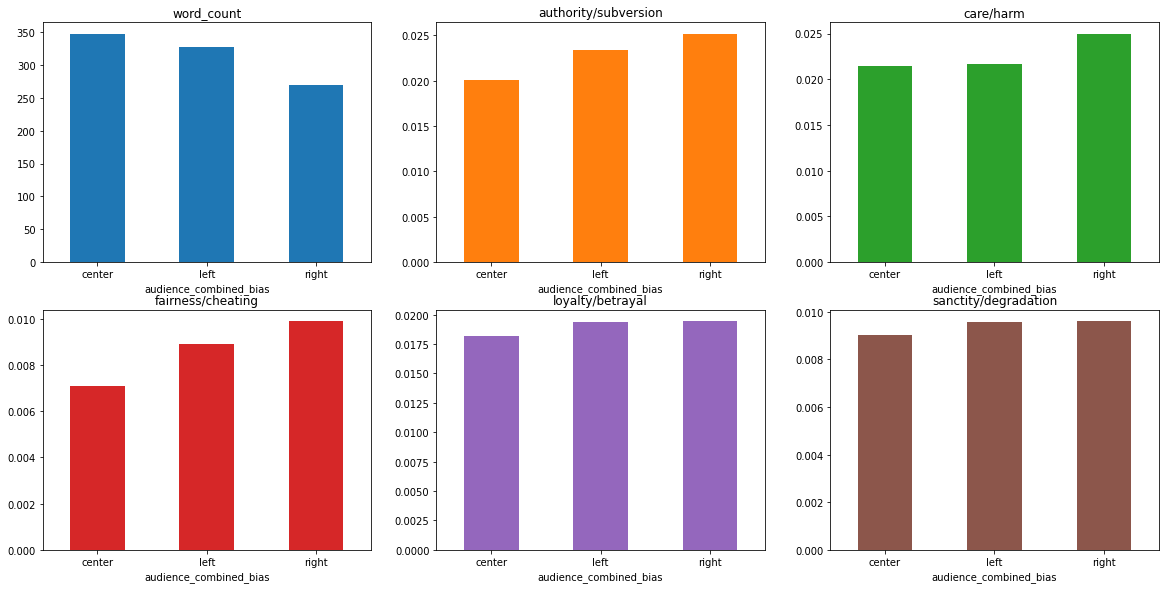

In [188]:
mf_df_abridged.groupby('audience_combined_bias').mean().plot(kind='bar', figsize=(20,15), subplots=True, legend=False, sharex=False, layout=(3,3), rot=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7d51d1fd0>,
      dtype=object)

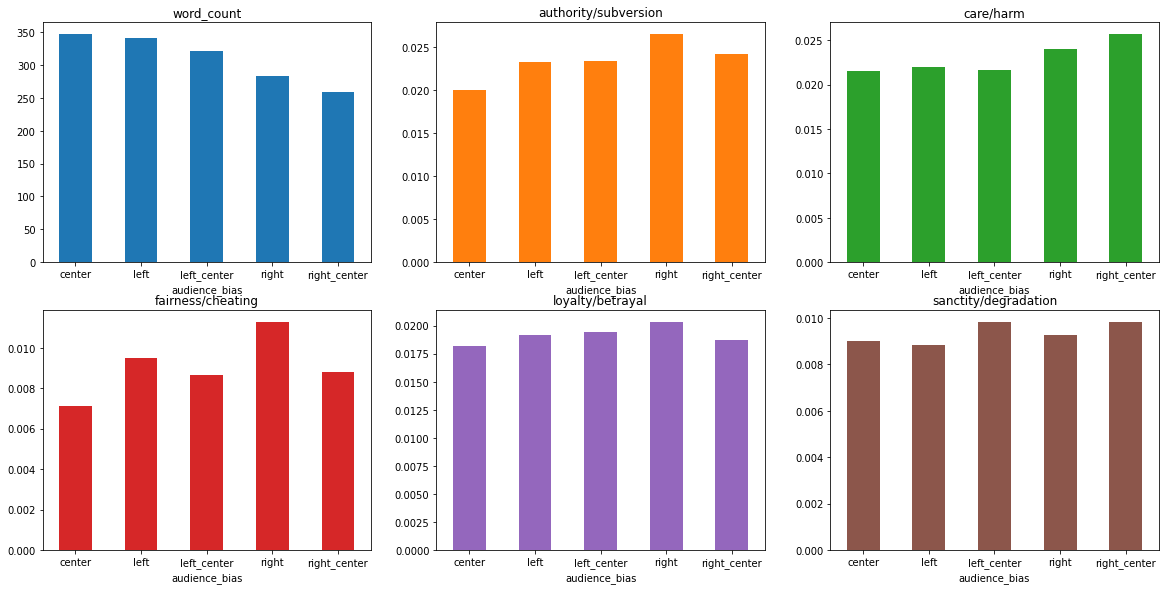

In [232]:
mf_df_abridged.groupby('audience_bias').mean().plot(kind='bar', figsize=(20,15), subplots=True, legend=False, sharex=False, layout=(3,3), rot=0)

In [189]:
mf_df_abridged.groupby('audience_combined_bias').mean()

,word_count,authority/subversion,care/harm,fairness/cheating,loyalty/betrayal,sanctity/degradation
audience_combined_bias,,,,,,
center,347.647026,0.020054,0.021490,0.007112,0.018200,0.009011
left,327.503158,0.023343,0.021711,0.008915,0.019357,0.009556
right,269.905615,0.025177,0.024978,0.009883,0.019417,0.009590


## Imports

In [1]:
import spacy

In [205]:
!pip install more-itertools

     |████████████████████████████████| 48 kB 5.0 MB/s eta 0:00:011
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [208]:
import more_itertools as mit

In [ ]:
!python -m spacy download en

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
from nltk.stem.snowball import SnowballStemmer
import os
import re
import requests

In [ ]:
#df = pd.read_csv('gdelt_text_updated_3.5.21.csv')

## Loading moral foundations lexicon

In [211]:
#loading moral foundations dictionary
data = requests.get('https://raw.githubusercontent.com/ds-modules/XRHETOR-R1A/v1.0/mft_data/haidt_dict.json')

mft = data.json()

mft.keys()

In [218]:
#setting length of each moral foundation list length to write to datafame
mft_2 = {}
for record in list(mft.keys()):
    new_mft = list(mit.padded(mft[record], None, 89))
    mft_2[record] = new_mft

In [223]:
#pd.DataFrame.from_dict(mft_2).to_csv('moral_foundations_words.csv')

In [226]:
pd.set_option('display.max_rows', 100)

In [227]:
#language associated with each foundation
pd.DataFrame.from_dict(mft_2)

,authority/subversion,care/harm,fairness/cheating,loyalty/betrayal,sanctity/degradation
0,preserve,safe,fair,abandon,preserve
1,loyal,peace,fairly,segregat,ruin
2,betray,compassion,fairness,together,exploit
3,treason,empath,fair,nation,exploits
4,traitor,sympath,fairmind,homeland,exploited
5,treacher,care,fairplay,family,exploiting
6,disloyal,caring,equal,families,apostasy
7,apostasy,protect,justice,familial,apostate
8,apostate,shield,justness,group,heretic
9,deserted,shelter,justifi,loyal,piety


## Loading Text Data

In [7]:
mf_df = pd.read_csv('foundations_count.csv')

In [8]:
#calculating percent of moral words for each record
for foundation in mft.keys():
    mf_df[foundation] = (mf_df[foundation]/mf_df['word_count'])

In [10]:
#getting rid of publishers will low number of articles
mf_df_abridged = mf_df.loc[~mf_df['domain'].isin(['buzzfeed', 'msn', 'cnbc', 'knpr', 'wnpr', 'sabcnews'])]

In [155]:
#dropping unneeded columns
mf_df_abridged.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', ], axis=1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [229]:
mf_df_abridged['domain'].value_counts()

reuters           23797
foxnews           21933
nytimes           17927
usatoday          14400
cnn               13880
latimes           12872
breitbart         12464
nbcnews            9298
cbsnews            7096
npr                5251
nationalreview     4179
vox                3463
msnbc              1153
huffpost            970
Name: domain, dtype: int64

In [ ]:
# for foundation in mft.keys():
#     curr_words = mft[foundation]
#     new_curr_words = []
#     for word in curr_words:
#         sp_word = nlp(word)
#         for word in sp_word:
#             new_curr_words.append(word.lemma_)
#     lemma_mft_dict[foundation] = new_curr_words
        
            
#     print(curr_words)
#     #stemmed_words = [stemmer.stem(word) for word in curr_words]
#     #mft[foundation] = stemmed_words

In [56]:
# lemmed_stop_words = []
# for word in stop_words:
#     sp_word = nlp(word)
#     for word in sp_word:
#         lemmed_stop_words.append(word.lemma_.lower())

In [44]:
# author_list = set()
# for idx, authors in enumerate(list(mf_df_abridged['authors'])):

#     authors = authors.strip('[').strip(']').replace("'", "" ).replace(",", "").replace(".", "")
#     authors = authors.split(' ')
#     author_list.update(authors)
#     print(idx)


# #     for name in authors:

# #         if name not in author_list:
# #             author_list.append(name.lower())

In [88]:
def strip_stop_words(text):
    #tokens = word_tokenize(text)
    text_tokens = [word for word in text if not word in stop_words]
    #text_str = (" ").join(text_tokens)
    return text_tokens

In [53]:
nlp = spacy.load('en', disable=['tagger', 'parser', 'ner'])

In [89]:
mf_df_abridged['text_list_v2'] = mf_df_abridged['text_list'].apply(lambda x: convert_text_to_list(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
cls = spacy.util.get_lang_class('en')


cls.Defaults.stop_words.add('updat')

cls.Defaults.stop_words.add('stori')

for word in ['recent', 'co', 'statement']:
    cls.Defaults.stop_words.add(word)

nlp = spacy.load('en', disable=['tagger', 'parser', 'ner'])

In [140]:
def spacy_stop_remove(text):
    text =text.strip('[').strip(']').replace("'", "" ).replace(",", "").replace(".", "")
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop]
    return tokens

# lemmed_stop_words = []
# for word in stop_words:
#     sp_word = nlp(word)
#     for word in sp_word:
#         lemmed_stop_words.append(word.lemma_.lower())

In [141]:
mf_df_abridged['text_stop_removed'] = mf_df_abridged['text_list'].apply(lambda x: spacy_stop_remove(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
media_dict = {'breitbart': 'right', 'cbsnews': 'left_center', 'cnn': 'left', 'foxnews': 'right_center', 'huffpost': 'left', 'npr': 'center', 'latimes': 'left_center', 'msnbc': 'left', 'nationalreview': 'right', 'nbcnews': 'left_center', 'nytimes': 'left_center', 'reuters': 'center', 'usatoday': 'center', 'vox': 'left'}

In [231]:
pd.set_option('display.max_columns', 100)
mf_df_abridged

,GKGRECORDID,DATE,DocumentIdentifier,V2Tone,title,authors,publish_date,text,text_tokens,domain,tt_v3,text_list,word_count,authority/subversion,care/harm,fairness/cheating,loyalty/betrayal,sanctity/degradation,text_list_v2,text_stop_removed,audience_bias,audience_combined_bias
0,20190227000000-1555,2019-02-27 00:00:00,https://www.cbsnews.com/news/thousands-of-migr...,"-7.41687979539642,1.79028132992327,9.207161125...",Thousands of migrant children were sexually ab...,"['Camilo Montoya-Galvez', 'Camilo Montoya-Galv...",NaN,This story has been updated with the most rece...,story update recent statement department healt...,cbsnews,story update recent statement department healt...,"['stori', 'updat', 'recent', 'statement', 'dep...",514,0.023346,0.064202,0.021401,0.013619,0.007782,"[stori, updat, recent, statement, depart, heal...","[depart, health, human, servic, hh, washington...",left_center,left
1,20190227000000-318,2019-02-27 00:00:00,https://www.huffpost.com/entry/california-salm...,"-0.0779220779220777,2.7012987012987,2.77922077...",This Project Aimed To Be A Model For Saving Fa...,['Margiana Petersen-Rockney'],2019-02-26 15:22:35-05:00,This story was produced and originally publish...,story produce originally publish grist reprodu...,huffpost,story produce originally publish grist reprodu...,"['stori', 'produc', 'origin', 'publish', 'gris...",1848,0.011364,0.016775,0.009740,0.027056,0.003788,"[stori, produc, origin, publish, grist, reprod...","[produc, origin, publish, grist, reproduc, cli...",left,left
2,20190227000000-315,2019-02-27 00:00:00,https://www.huffpost.com/entry/us-military-int...,"-3.91414141414141,3.15656565656566,7.070707070...",The U.S. Is Moving Closer To Military Interven...,['On Assignment For Huffpost'],2019-02-26 17:07:51-05:00,"CÚCUTA, Colombia — The U.S. moved closer to mi...",cúcuta colombia u.s. move close military inter...,huffpost,cúcuta colombia u.s. move close military inter...,"['cúcuta', 'colombia', 'u.s.', 'move', 'close'...",771,0.036316,0.041505,0.005188,0.024643,0.001297,"[cúcuta, colombia, us, move, close, militari, ...","[cúcuta, colombia, close, militari, intervent,...",left,left
3,20190227000000-181,2019-02-27 00:00:00,http://www.latimes.com/socal/burbank-leader/ne...,"6.957928802589,7.92880258899676,0.970873786407...",No plateau in sight for Burroughs High senior ...,"['Staff Writer', 'Andrew J. Campa Covers The E...",2019-02-26 00:00:00,It’s not the glistening tiara nor the royal pu...,glisten tiara royal purple line sash burroughs...,latimes,glisten tiara royal purple line sash burroughs...,"['glisten', 'tiara', 'royal', 'purpl', 'line',...",265,0.018868,0.000000,0.015094,0.018868,0.018868,"[glisten, tiara, royal, purpl, line, sash, bur...","[glisten, tiara, royal, purpl, line, sash, bur...",left_center,left
4,20190227000000-2604,2019-02-27 00:00:00,https://uk.reuters.com/article/us-usa-congress...,"0.770416024653313,3.54391371340524,2.773497688...",U.S. House Democrats introduce sweeping 'Medic...,['Yasmeen Abutaleb'],2019-02-26 22:18:42+00:00,WASHINGTON (Reuters) - Democrats in the U.S. H...,washington reuters democrats u.s. house repres...,reuters,washington reuters democrats u.s. house repres...,"['washington', 'reuter', 'democrat', 'u.s.', '...",314,0.028662,0.003185,0.000000,0.009554,0.111465,"[washington, reuter, democrat, us, hous, repre...","[washington, reuter, democrat, hous, repres, u...",center,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163424,20191001234500-1171,2019-10-01 23:45:00,https://www.latimes.com/california/story/2019-...,"0.482758620689655,3.37931034482759,2.896551724...",Cemetery for forgotten babies commemorates its...,['Pam Kragen Is A Feature Writer Who Specializ...,2019-10-01 00:00:00,"“Adam, Jaren, Angel ... John, Sebastian, Star ...",adam jaren angel john sebastian star anthony b...,latimes,adam jaren angel john sebastian star anthony b...,"['adam', 'jaren', 'angel', 'john', 'sebastian'...",686,0.0

In [146]:
mf_df_abridged['audience_bias'] = mf_df_abridged['domain'].apply(lambda x: media_dict[x])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
mf_df_abridged['audience_bias'].value_counts()

left_center     47193
center          43448
right_center    21933
left            19466
right           16643
Name: audience_bias, dtype: int64

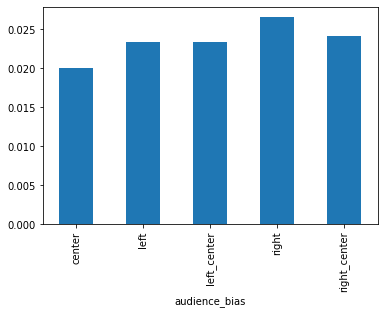

In [150]:
mf_df_abridged.groupby('audience_bias').mean()['authority/subversion'].plot(kind='bar')

In [158]:
mf_df_abridged.drop('text_length', axis=1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [186]:
combined_lean = {'center': 'center', 'right': 'right', 'right_center': 'right', 'left:': 'left', 'left_center': 'left'}

In [187]:
mf_df_abridged['audience_combined_bias'] = mf_df_abridged['audience_bias'].apply(lambda x: combined_lean[x])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
